In [1]:
import warnings
warnings.filterwarnings('ignore')

# libraby for linear algebra
import numpy as np 

# library for data processing
import pandas as pd 

# library for data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

### Data Reading

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head()

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
0,T0005689460,6.77,B,1.0,2.42769,A,A,3.90500,0,40.0,46,60,Female,2
1,T0005689461,29.47,B,10.0,2.78245,B,A,3.45000,0,38.0,56,78,Male,2
2,T0005689464,41.58,NaN,10.0,NaN,NaN,E,3.50125,2,NaN,56,77,Male,2
3,T0005689465,61.56,C,10.0,NaN,NaN,A,3.45375,0,NaN,52,74,Male,3
4,T0005689467,54.95,C,10.0,3.03453,B,A,3.40250,4,51.0,49,102,Male,2


In [3]:
# Top 5 records of train dataframe
train.head()

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
0,T0005689460,6.77,B,1.0,2.42769,A,A,3.90500,0,40.0,46,60,Female,2
1,T0005689461,29.47,B,10.0,2.78245,B,A,3.45000,0,38.0,56,78,Male,2
2,T0005689464,41.58,NaN,10.0,NaN,NaN,E,3.50125,2,NaN,56,77,Male,2
3,T0005689465,61.56,C,10.0,NaN,NaN,A,3.45375,0,NaN,52,74,Male,3
4,T0005689467,54.95,C,10.0,3.03453,B,A,3.40250,4,51.0,49,102,Male,2


In [4]:
# Check the column-wise info of the train dataframe
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131662 entries, 0 to 131661
Data columns (total 14 columns):
Trip_ID                        131662 non-null object
Trip_Distance                  131662 non-null float64
Type_of_Cab                    111452 non-null object
Customer_Since_Months          125742 non-null float64
Life_Style_Index               111469 non-null float64
Confidence_Life_Style_Index    111469 non-null object
Destination_Type               131662 non-null object
Customer_Rating                131662 non-null float64
Cancellation_Last_1Month       131662 non-null int64
Var1                           60632 non-null float64
Var2                           131662 non-null int64
Var3                           131662 non-null int64
Gender                         131662 non-null object
Surge_Pricing_Type             131662 non-null int64
dtypes: float64(5), int64(4), object(5)
memory usage: 14.1+ MB


In [5]:
# Get a summary of the train dataframe using 'describe()'
train.describe()

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Surge_Pricing_Type
count,131662.000000,125742.000000,111469.000000,131662.000000,131662.000000,60632.000000,131662.000000,131662.000000,131662.000000
mean,44.200909,6.016661,2.802064,2.849458,0.782838,64.202698,51.202800,75.099019,2.155747
std,25.522882,3.626887,0.225796,0.980675,1.037559,21.820447,4.986142,11.578278,0.738164
min,0.310000,0.000000,1.596380,0.001250,0.000000,30.000000,40.000000,52.000000,1.000000
25%,24.580000,3.000000,2.654730,2.152500,0.000000,46.000000,48.000000,67.000000,2.000000
50%,38.200000,6.000000,2.798050,2.895000,0.000000,61.000000,50.000000,74.000000,2.000000
75%,60.730000,10.000000,2.946780,3.582500,1.000000,80.000000,54.000000,82.000000,3.000000
max,109.230000,10.000000,4.875110,5.000000,8.000000,210.000000,124.000000,206.000000,3.000000


In [6]:
# Check the number of rows and columns in the dataframes
print(train.shape)
print(test.shape)

(131662, 14)
(87395, 13)


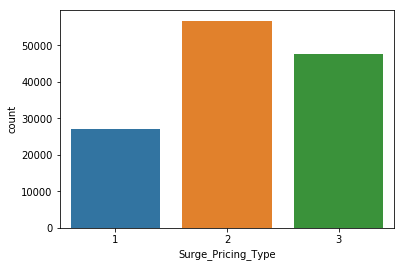

In [7]:
sns.countplot(train['Surge_Pricing_Type'])
plt.show()

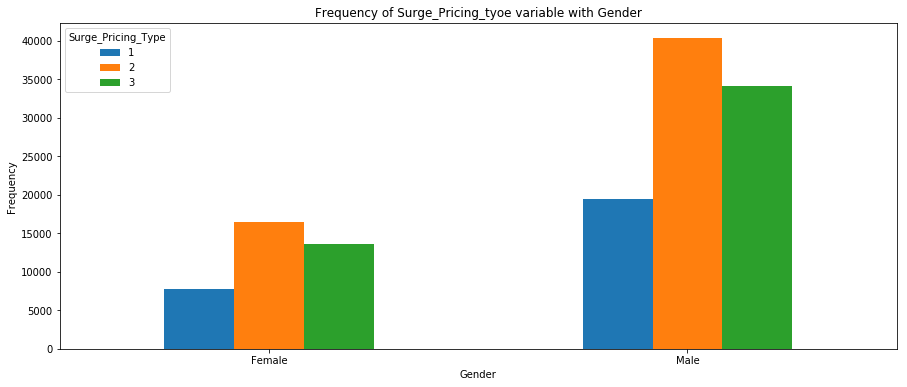

In [8]:
# See the Surge_Pricing_Type with the Gender
pd.crosstab(train['Gender'],train['Surge_Pricing_Type'] ).plot(kind="bar",figsize=(15,6))
plt.title('Frequency of Surge_Pricing_tyoe variable with Gender')
plt.xticks(rotation=0)
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.show()

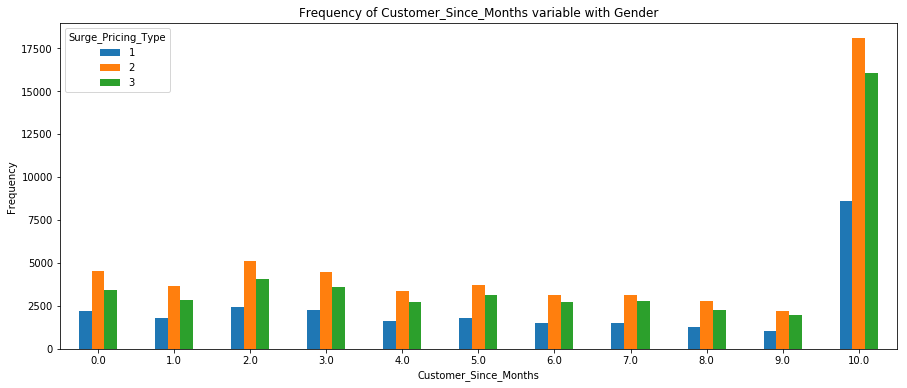

In [9]:
# See the Surge_Pricing_Type with the Gender
pd.crosstab(train['Customer_Since_Months'],train['Surge_Pricing_Type'] ).plot(kind="bar",figsize=(15,6))
plt.title('Frequency of Customer_Since_Months variable with Gender')
plt.xticks(rotation=0)
plt.xlabel('Customer_Since_Months')
plt.ylabel('Frequency')
plt.show()

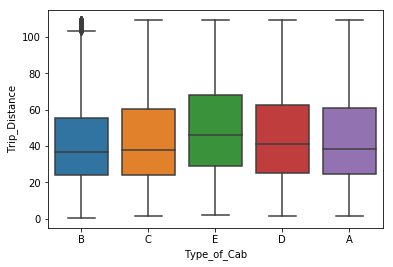

In [10]:
# Outlier analysis for Type_of_cab with Trip distance variable
sns.boxplot(x='Type_of_Cab',y = 'Trip_Distance',data=train)
plt.show()

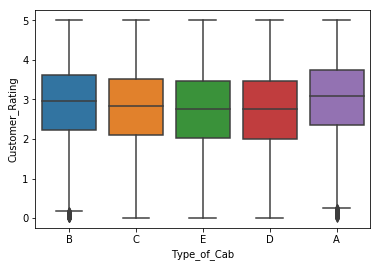

In [11]:
# Outlier analysis for Customer_rating with trip distance variable
sns.boxplot(x='Type_of_Cab',y = 'Customer_Rating',data=train)
plt.show()

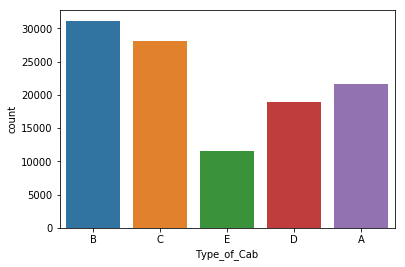

In [12]:
sns.countplot(train['Type_of_Cab'])
plt.show()

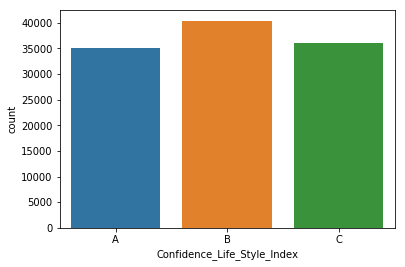

In [13]:
sns.countplot(train['Confidence_Life_Style_Index'])
plt.show()

### Data cleaning and Data Prepration

In [14]:
# Get the column-wise Null count
train.isnull().sum()

Trip_ID                            0
Trip_Distance                      0
Type_of_Cab                    20210
Customer_Since_Months           5920
Life_Style_Index               20193
Confidence_Life_Style_Index    20193
Destination_Type                   0
Customer_Rating                    0
Cancellation_Last_1Month           0
Var1                           71030
Var2                               0
Var3                               0
Gender                             0
Surge_Pricing_Type                 0
dtype: int64

In [15]:
# Get the column-wise Null Percentage
round(100*(train.isnull().sum()/len(train)),2)

Trip_ID                         0.00
Trip_Distance                   0.00
Type_of_Cab                    15.35
Customer_Since_Months           4.50
Life_Style_Index               15.34
Confidence_Life_Style_Index    15.34
Destination_Type                0.00
Customer_Rating                 0.00
Cancellation_Last_1Month        0.00
Var1                           53.95
Var2                            0.00
Var3                            0.00
Gender                          0.00
Surge_Pricing_Type              0.00
dtype: float64

In [16]:
# Filling null values train dataset with mean of that column
train['Type_of_Cab'].fillna("B", inplace=True)
train['Customer_Since_Months'].fillna(round(train['Customer_Since_Months'].mean()),inplace=True)
train['Life_Style_Index'].fillna(train['Life_Style_Index'].mean(),inplace=True)
train['Confidence_Life_Style_Index'].fillna("B",inplace=True)
train['Var1'].fillna(round(train['Var1'].mean()),inplace=True)

In [17]:
# Get the column-wise Null count
test.isnull().sum()

Trip_ID                            0
Trip_Distance                      0
Type_of_Cab                    13158
Customer_Since_Months           3966
Life_Style_Index               13327
Confidence_Life_Style_Index    13327
Destination_Type                   0
Customer_Rating                    0
Cancellation_Last_1Month           0
Var1                           46789
Var2                               0
Var3                               0
Gender                             0
dtype: int64

In [18]:
# Get the column-wise Null Percentage
round(100*(test.isnull().sum()/len(test)),2)

Trip_ID                         0.00
Trip_Distance                   0.00
Type_of_Cab                    15.06
Customer_Since_Months           4.54
Life_Style_Index               15.25
Confidence_Life_Style_Index    15.25
Destination_Type                0.00
Customer_Rating                 0.00
Cancellation_Last_1Month        0.00
Var1                           53.54
Var2                            0.00
Var3                            0.00
Gender                          0.00
dtype: float64

In [19]:
# Filling null values test dataset with mean of that column
test['Type_of_Cab'].fillna("B", inplace=True)
test['Customer_Since_Months'].fillna(round(test['Customer_Since_Months'].mean()),inplace=True)
test['Life_Style_Index'].fillna(test['Life_Style_Index'].mean(),inplace=True)
test['Confidence_Life_Style_Index'].fillna("B",inplace=True)
test['Var1'].fillna(round(test['Var1'].mean()),inplace=True)

### Label Encoding

In [20]:
categorical_var = ['Type_of_Cab','Confidence_Life_Style_Index','Destination_Type','Gender']

# Label Encoding
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

for x in categorical_var:
    if train[x].dtype == type(object):
        encoder = LabelEncoder()
        encoder.fit(list(set(list(train[x]) + list(test[x]))))
        train[x] = encoder.transform(train[x])
        test[x] = encoder.transform(test[x])

In [21]:
train.head()

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
0,T0005689460,6.77,1,1.0,2.427690,0,0,3.90500,0,40.0,46,60,0,2
1,T0005689461,29.47,1,10.0,2.782450,1,0,3.45000,0,38.0,56,78,1,2
2,T0005689464,41.58,1,10.0,2.802064,1,4,3.50125,2,64.0,56,77,1,2
3,T0005689465,61.56,2,10.0,2.802064,1,0,3.45375,0,64.0,52,74,1,3
4,T0005689467,54.95,2,10.0,3.034530,1,0,3.40250,4,51.0,49,102,1,2


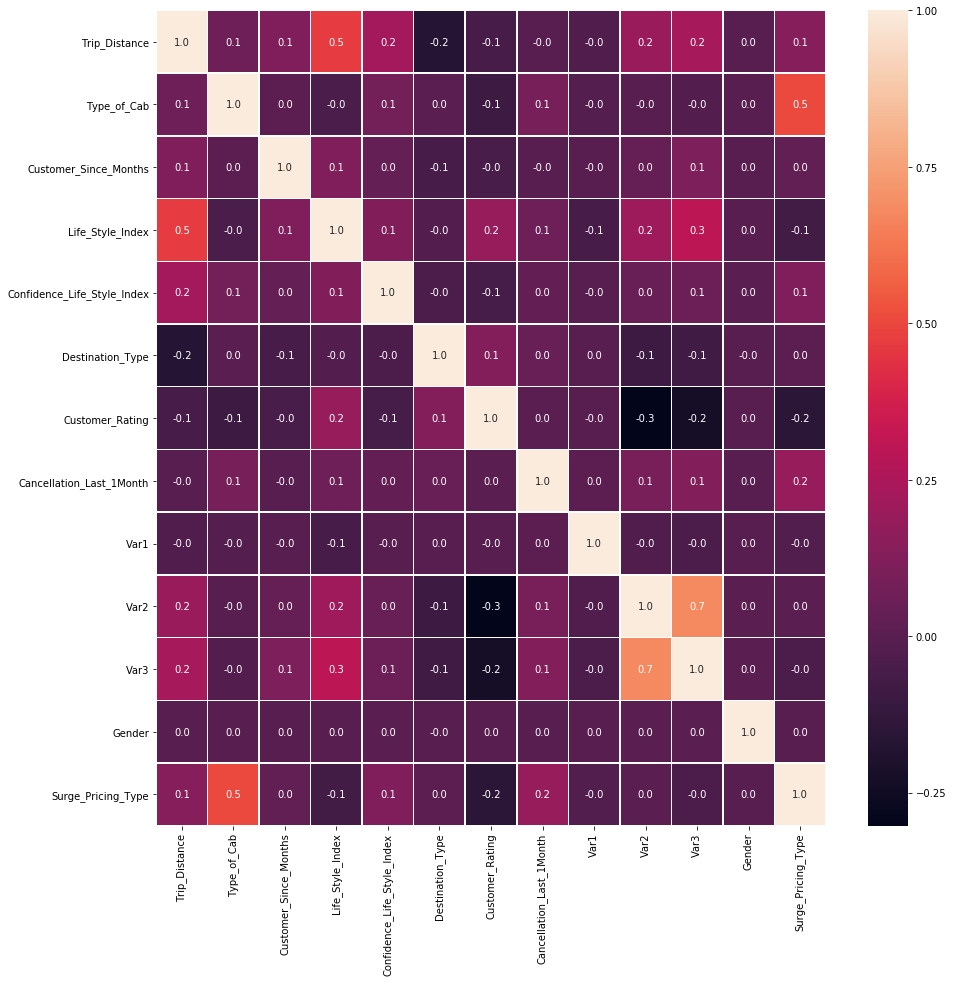

In [22]:
# plot training dataset heatmap
f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(train.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [23]:
# Dropping unnecessary columns from train dataset
train.drop(['Trip_ID','Gender'], axis=1, inplace=True)
test.drop(['Trip_ID','Gender'], axis=1, inplace=True)

In [24]:
X = train.drop(['Surge_Pricing_Type'],axis=1)
y = train['Surge_Pricing_Type']

In [25]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
test_data = sc.transform(test.copy().values)

C:\Users\shree\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\shree\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\shree\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


In [26]:
# XGB Classifier
from xgboost import XGBClassifier

xgb = XGBClassifier( learning_rate =0.1,
 n_estimators=112,
 max_depth=9,
 min_child_weight=5,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.6,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=13,
 reg_lambda=5,
# max_delta_step=1,
 alpha=0,
 base_score=0.5,
 seed=1029)

xgb.fit(X_train, y_train)

# Predicting the Test set results
y_pred = xgb.predict(X_test)  

# Accuracy of XGB model
accuracy_xgb = round(xgb.score(X_train, y_train) * 100, 2)
print("Accuracy score of XGB algorithm is:", accuracy_xgb)

Accuracy score of XGB algorithm is: 73.8


In [27]:
# Predicting the Test set results
test_pred = xgb.predict(test_data)

In [28]:
# load Trip_id of test dataset
test_Trip_ID = pd.read_csv('test.csv')['Trip_ID']
print(test_Trip_ID.shape)

(87395,)


In [29]:
# save results to csv
submission_file = pd.DataFrame({'Trip_ID': test_Trip_ID, 'Surge_Pricing_Type': test_pred})
submission_file = submission_file[['Trip_ID','Surge_Pricing_Type']] 
submission_file.to_csv('XGB2_Solution.csv', index=False)